In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


# Train CV Model and Save Weights

In [2]:
checkpoint_filepath = "mnist_weights/saved-model-{epoch:02d}-{val_acc:.2f}.hdf5"

In [3]:
batch_size = 128
num_classes = 10
epochs = 100

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

filepath = checkpoint_filepath
checkpoint = ModelCheckpoint(filepath, save_weights_only=True, monitor='val_acc', save_best_only=False, mode='max')

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=False,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Test loss: 0.039861418493768064
Test accuracy: 0.9932


In [5]:
losses = pd.DataFrame.from_dict(history.history)
losses.rename(columns={'loss':'train_loss', 'acc':'train_acc'}, inplace=True)
losses.to_csv("mnist_weights/history.csv")

# View Loss Plot

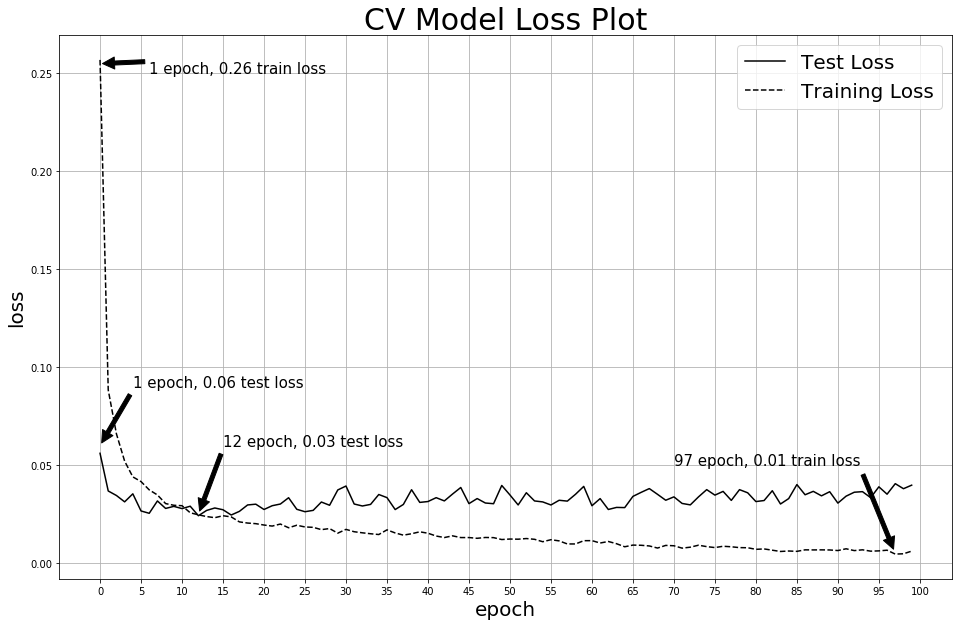

In [44]:
losses = pd.read_csv('MNIST/mnist_weights/history.csv')

plt.figure(figsize=(16,10))

plt.title('CV Model Loss Plot', fontsize=30)

plt.plot(losses['val_loss'], linestyle='solid', color='black', label='Test Loss')
plt.plot(losses['train_loss'], linestyle='dashed' , color='black', label='Training Loss')

plt.xticks(np.arange(0,101,5))

plt.ylabel('loss', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(fontsize=20)
plt.grid()

plt.annotate('1 epoch, {:.2f} test loss'.format(losses.iloc[0].val_loss), xy=(0, 0.06), xycoords='data',
             xytext=(4, 0.09), textcoords='data', fontsize=15,
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('12 epoch, {:.2f} test loss'.format(losses.iloc[11].val_loss), xy=(12, 0.025), xycoords='data',
             xytext=(15, 0.06), textcoords='data', fontsize=15,
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('1 epoch, {:.2f} train loss'.format(losses.iloc[0].train_loss), xy=(0, 0.255), xycoords='data',
             xytext=(6, 0.25), textcoords='data', fontsize=15,
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('97 epoch, {:.2f} train loss'.format(losses.iloc[96].train_loss), xy=(97, 0.005), xycoords='data',
             xytext=(70, 0.05), textcoords='data', fontsize=15,
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.savefig('CV_loss_plot.png', bbox_inches='tight')
plt.show()

# Save CV Model Predict

In [31]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.load_weights("MNIST/mnist_weights/saved-model-12-0.99.hdf5")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [32]:
x,y = x_train, y_train

softmaxes = model.predict(x)

predictions = np.argmax(softmaxes, axis=1)
labels = np.argmax(y, axis=1)
data = np.concatenate((softmaxes,
                       predictions.reshape((x.shape[0],1)),
                       labels.reshape((x.shape[0],1))), axis=1)
output = pd.DataFrame(data,columns=[str(i) for i in range(10)]+['pred','label'])

output.to_csv('MNIST/CV_predictions_train_12ep.csv')